1.2.1 Задание
Задача:
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.


[0 3 6 9]
[-1.0123  0.21    1.05    2.134 ]


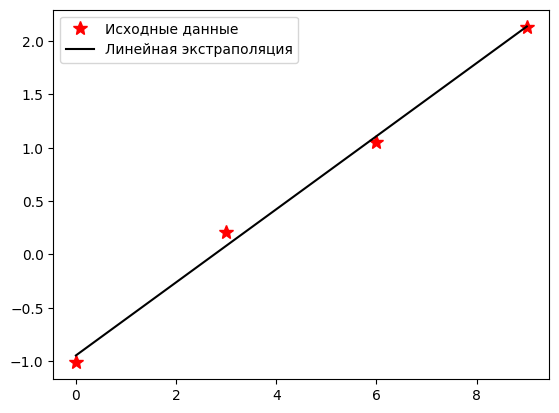

[-6.38747091 -6.51946082 -5.89921448 -5.07644585 -4.58213241 -2.68850528
 -2.08414721 -1.22829936 -0.66632479 -0.35422803 -0.12822248  0.58256984
  1.92079238  2.89657254  3.21836395  3.75231245  5.39418297  5.70331672
  6.5140275   7.01794823]
[49.47685393 39.01301034 30.5879322  23.04295906 16.89866979 10.8574401
  6.92172456  3.74040101  1.36670676  0.70796346  0.56885396  1.26154678
  3.37977073  6.94714169 11.64039329 16.48060382 22.4980503  30.50329442
 38.75938468 49.21400104]


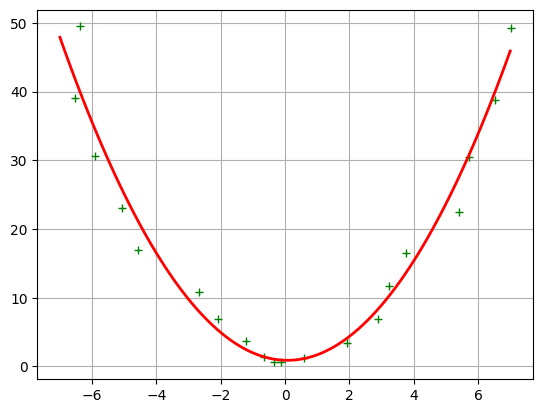

[-6.38747091 -6.51946082 -5.89921448 -5.07644585 -4.58213241 -2.68850528
 -2.08414721 -1.22829936 -0.66632479 -0.35422803 -0.12822248  0.58256984
  1.92079238  2.89657254  3.21836395  3.75231245  5.39418297  5.70331672
  6.5140275   7.01794823]
[49.47685393 39.01301034 30.5879322  23.04295906 16.89866979 10.8574401
  6.92172456  3.74040101  1.36670676  0.70796346  0.56885396  1.26154678
  3.37977073  6.94714169 11.64039329 16.48060382 22.4980503  30.50329442
 38.75938468 49.21400104]


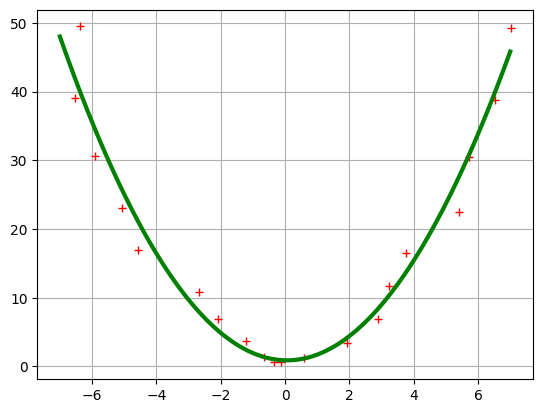

In [185]:
#Решение
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *
from random import *
import numpy as np
#1ый
x = np.array([0,3,6,9])
y = np.array([-1.0123, 0.21, 1.05, 2.134])

A = np.vstack((x, np.ones(len(x)))).T

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(x)
print(y)
plt.plot(x, y, '*',color='red', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'black', label='Линейная экстраполяция')
plt.legend()
plt.show()
#2ой
delta = 1.2
x = np.linspace(-7, 7, 20)
y = x**2+delta*(np.random.rand(20)-0.45423425454364236)
x += delta*(np.random.rand(20)-0.45345343453542)
m = np.vstack((x ** 2, x, np.ones(20))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(-7,7, 99)
print(x)
print(y)
plt.plot(x, y, '+',color='g')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], 'red', lw=2)
plt.grid()
plt.savefig('парабола.png')
plt.show()
#3ий
m = np.vstack((x ** 3, x ** 2, x, np.ones(20))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec =np.linspace(-7, 7, 99)
print(x)
print(y)
plt.plot(x, y, '+',color='r')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], 'green', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')
plt.show()

1.2.2 Задание
Задача:
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

[4.80487682e+215 2.95919184e-003 3.23683133e-003 2.33627535e-003
 3.60495600e+016]


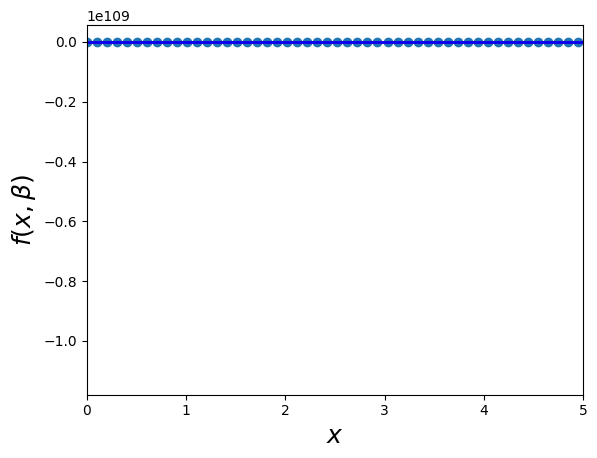

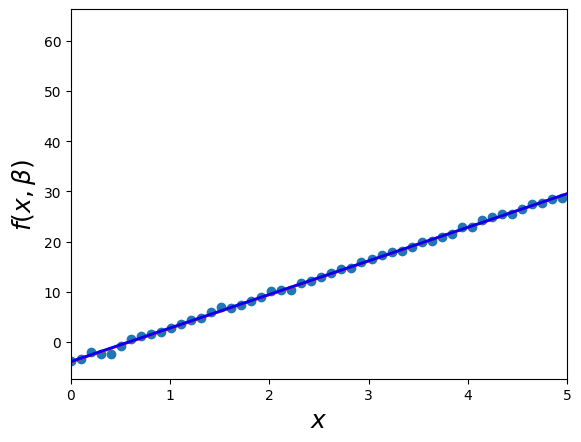

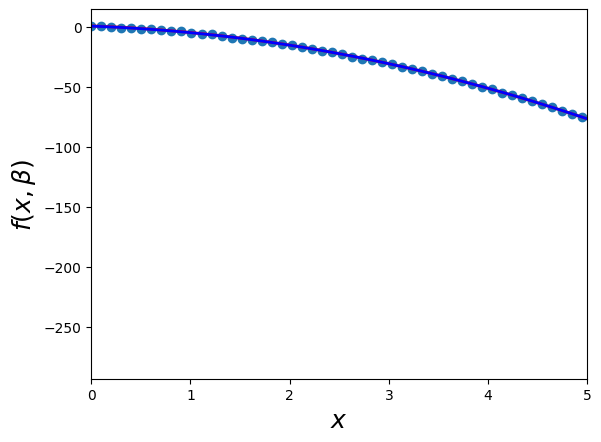

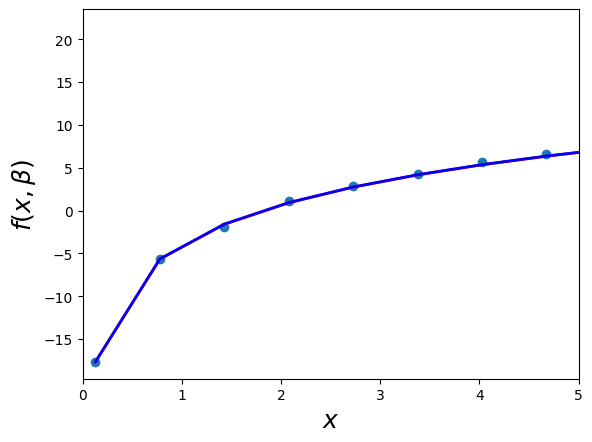

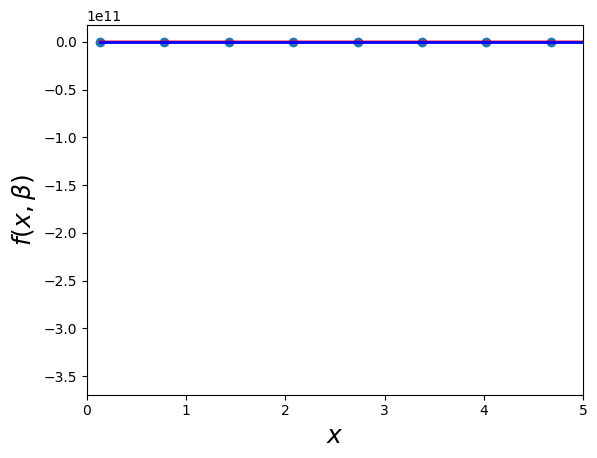

In [28]:
#Решение
import numpy as np
import random
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
def exponent(x,b0,b1,b2):
    return b0+ b1 * np.exp(-b2*x**2)
def line(x,b0,b1):
    return b0+ b1 *x
def par(x,b0,b1,b2):
    return b0+ b1 *x + b2 * x**2
def log(x,b0,b1):
    return b0+ b1 * np.log(x)
def pok(x,b0,b1):
    return b0* x**b1
beta1 = (-4, 6.7)
beta2=(0.65, -3, -2.5)
xdata = np.linspace (0, 10, 100)
log_xdata=np.linspace(0.13, 43, 67)
y1= exponent(xdata,*beta2)
y2= line(xdata,*beta1)
y3= par(xdata,*beta2)
y4= log(log_xdata,*beta1)
y5= pok(log_xdata,*beta1)

ydata1=y1+0.31 * np.random.randn(len(xdata))
ydata2=y2+0.26 * np.random.randn(len(xdata))
ydata3=y3+0.21 * np.random.randn(len(xdata))
ydata4=y4+0.16 * np.random.randn(len(log_xdata))
ydata5=y5+0.11 * np.random.randn(len(log_xdata))
beta_opt1, beta_cov1 = sp.optimize.curve_fit(exponent,xdata,ydata1)
beta_opt2, beta_cov2 = sp.optimize.curve_fit(line,xdata,ydata2)
beta_opt3, beta_cov3 = sp.optimize.curve_fit(par,xdata,ydata3)
beta_opt4, beta_cov4 = sp.optimize.curve_fit(log,log_xdata,ydata4)
beta_opt5, beta_cov5 = sp.optimize.curve_fit(pok,log_xdata,ydata5)
lin_dev =np.array( [sum(beta_cov1[0]), sum(beta_cov2[0]), sum(beta_cov3[0]), sum(beta_cov4[0]), sum(beta_cov5[0])])
print(lin_dev)
fig, ax = plt.subplots() 
ax.scatter(xdata, ydata1)
ax.plot(xdata, y1, 'r', lw=2)
ax.plot(xdata, exponent(xdata, *beta_opt1), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()
fig, ax = plt.subplots() 
ax.scatter(xdata, ydata2)
ax.plot(xdata, y2, 'r', lw=2)
ax.plot(xdata, line(xdata, *beta_opt2), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()
fig, ax = plt.subplots() 
ax.scatter(xdata, ydata3)
ax.plot(xdata, y3, 'r', lw=2)
ax.plot(xdata, par(xdata, *beta_opt3), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()
fig, ax = plt.subplots() 
ax.scatter(log_xdata, ydata4)
ax.plot(log_xdata, y4, 'r', lw=2)
ax.plot(log_xdata, log(log_xdata, *beta_opt4), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()
fig, ax = plt.subplots() 
ax.scatter(log_xdata, ydata5)
ax.plot(log_xdata, y5, 'r', lw=2)
ax.plot(log_xdata, pok(log_xdata, *beta_opt5), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

2.2.1 Задание
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы: (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз. 



26780.09915062818
[9312.57512673]


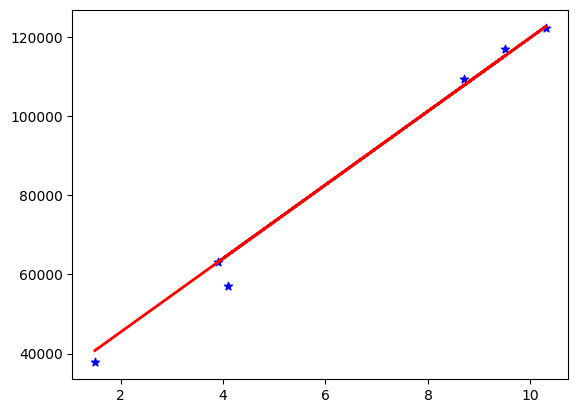

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
df = pd.read_csv(url)
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred=regressor.predict(x_test)
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data
plt.scatter(x_test,y_test,marker='*',color='blue')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.show()

3.2.1 Задание
Задача:
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
url="https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
df = pd.read_csv(url)
url1="https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
df1 = pd.read_csv(url1)
Y=df.iloc[:,-1].values
Y1=df1.iloc[:,-1].values
X=df.iloc[:,:-1].values
X1=df1.iloc[:,:-1].values
lin=np.linalg.lstsq(X,Y,rcond=None)[0]
print(lin)
lin1=np.linalg.lstsq(X1,Y1,rcond=None)[0]
print(lin1)


[-1.42389761e+01 -5.93847874e-02  1.20474812e-03  1.63089128e+03]
[ 4.19374044e-03 -1.09974310e+00 -1.84145975e-01  7.07117376e-03
 -1.91141882e+00  4.54780885e-03 -3.31855188e-03  4.52914616e+00
 -5.22898302e-01  8.87076125e-01  2.97022815e-01]


Задание 3.2.2
Задача: Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

     X    Y  Полином 1ый
0  5.0  2.0     3.095238
1  5.2  4.0     3.123810
2  5.4  4.0     3.152381
3  5.6  3.0     3.180952
4  5.8  3.0     3.209524
5  6.0  3.0     3.238095


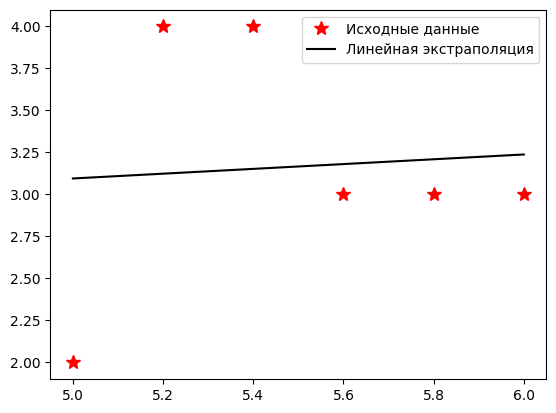

     X    Y  Полином 2ой
0  5.0  2.0     2.500000
1  5.2  4.0     3.242857
2  5.4  4.0     3.628571
3  5.6  3.0     3.657143
4  5.8  3.0     3.328571
5  6.0  3.0     2.642857


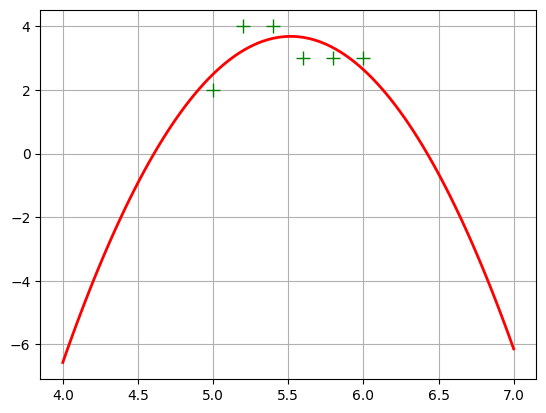

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Вариант 5 
# x= 5,0 5,2 5,4 5,6 5,8 6,0
# y= 2,0 4,0 4,0 3,0 3,0 3,0
x = np.array([5.0,5.2, 5.4, 5.6, 5.8, 6.0])
y= np.array([2.0, 4.0, 4.0, 3.0, 3.0 ,3.0])
A = np.vstack((x, np.ones(len(x)))).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
df=pd.DataFrame({'X':x, 'Y':y,'Полином 1ый':m*x + c})
print(df)
plt.plot(x, y, '*',color='red', label='Исходные данные', markersize=10)
plt.plot(x,m*x + c, 'black', label='Линейная экстраполяция')
plt.legend()
plt.show()
x = np.array([5.0,5.2, 5.4, 5.6, 5.8, 6.0])
y= np.array([2.0, 4.0, 4.0, 3.0, 3.0 ,3.0])
m = np.vstack((x ** 2, x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(4,7, 100)
plt.plot(x, y, '+',color='g',label='Исходные данные', markersize=10)
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], 'red', lw=2, label = 'Полином второй степени')
plt.grid()
df=pd.DataFrame({'X':x, 'Y':y,'Полином 2ой':s[0] * x**2 + s[1] * x+s[2]})
print(df)
plt.show()
